# LSTM

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\f

In [3]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing

In [4]:
from tensorflow import keras
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


## Data processing
### PM2.5

In [ ]:
import pandas as pd

In [2]:
# Data Preparation
data = pd.read_csv(r'C:\Users\ay0un\Desktop\Buenos_Aires\models\test\1h_1.csv')
#data = pd.read_csv('1h_model_data_pi.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:1074,:]

In [3]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi,hour,loc
0,2.200000,67.791667,7.280000,14.491667,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,...,14.282500,25.128571,36.428571,4.015714,9.323571,14.962143,11.823333,17.340833,22.0,0.0
1,2.075000,69.941667,6.376667,11.823333,17.340833,2.200000,67.791667,7.280000,14.491667,21.935833,...,18.859333,24.350000,34.175000,2.905000,8.352500,14.282500,16.170000,24.518333,23.0,0.0
2,2.050000,71.791667,8.087500,16.170000,24.518333,2.075000,69.941667,6.376667,11.823333,17.340833,...,28.408333,6.480000,49.986667,5.054000,11.749333,18.859333,13.952500,21.710833,0.0,0.0
3,1.983333,69.816667,6.544167,13.952500,21.710833,2.050000,71.791667,8.087500,16.170000,24.518333,...,23.088333,3.066667,61.100000,7.343333,17.540833,28.408333,10.430833,15.020833,1.0,0.0
4,1.758333,69.583333,5.843333,10.430833,15.020833,1.983333,69.816667,6.544167,13.952500,21.710833,...,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,7.693333,11.190000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,19.633333,36.091667,3.625000,9.433333,15.688333,20.070000,36.200000,2.704000,5.797000,9.036000,...,9.228000,21.416667,33.466667,2.684167,5.858333,9.194167,4.647273,6.926364,16.0,1.0
1070,18.481818,37.609091,2.420909,4.647273,6.926364,19.633333,36.091667,3.625000,9.433333,15.688333,...,9.993333,20.520000,34.980000,2.596000,5.820000,9.228000,8.526667,13.664167,17.0,1.0
1071,16.550000,50.075000,3.684167,8.526667,13.664167,18.481818,37.609091,2.420909,4.647273,6.926364,...,10.828182,20.108333,35.866667,2.847500,6.325833,9.993333,12.902500,20.120833,18.0,1.0
1072,14.775000,64.150000,6.013333,12.902500,20.120833,16.550000,50.075000,3.684167,8.526667,13.664167,...,9.036000,19.981818,35.990909,3.381818,7.029091,10.828182,6.644167,9.780833,19.0,1.0


In [6]:
# Only location A
df = data[data['loc'] == 0.0]

# Only locaiton B
# df = data[data['loc'] == 1.0]

# drop 'loc' column
df = df.drop('loc',axis=1)

In [7]:
labels = ['PM2.5_pi', 'PM10_pi']

In [8]:
# Split train & test
n = len(df)
train_df = df[0:int(n*0.8)]
# val_df = df[int(n*0.7):int(n*0.8)]
test_df = df[int(n*0.8):]

In [9]:
X_train = train_df.drop(train_df[labels], axis=1)
X_train.head()

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,hum_pi_t4,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,hour
0,2.200000,67.791667,7.280000,14.491667,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,...,34.175000,2.905000,8.352500,14.282500,25.128571,36.428571,4.015714,9.323571,14.962143,22.0
1,2.075000,69.941667,6.376667,11.823333,17.340833,2.200000,67.791667,7.280000,14.491667,21.935833,...,49.986667,5.054000,11.749333,18.859333,24.350000,34.175000,2.905000,8.352500,14.282500,23.0
2,2.050000,71.791667,8.087500,16.170000,24.518333,2.075000,69.941667,6.376667,11.823333,17.340833,...,61.100000,7.343333,17.540833,28.408333,6.480000,49.986667,5.054000,11.749333,18.859333,0.0
3,1.983333,69.816667,6.544167,13.952500,21.710833,2.050000,71.791667,8.087500,16.170000,24.518333,...,66.141667,6.643333,14.654167,23.088333,3.066667,61.100000,7.343333,17.540833,28.408333,1.0
4,1.758333,69.583333,5.843333,10.430833,15.020833,1.983333,69.816667,6.544167,13.952500,21.710833,...,67.791667,7.280000,14.491667,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,2.0


In [10]:
y_train1 = train_df['PM2.5_pi']
y_train2 = train_df['PM10_pi']

In [11]:
y_train1 = y_train1.to_frame()
y_train2 = y_train2.to_frame()

In [12]:
X_test = test_df.drop(test_df[labels], axis=1)
X_test

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,hum_pi_t4,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,hour
430,1.758333,65.433333,2.857500,5.095000,7.332500,1.681818,67.300000,3.049091,5.803636,8.612727,...,75.141667,3.826667,6.565000,9.265833,0.750000,77.991667,3.820833,6.529167,9.200000,10.0
431,6.133333,49.016667,2.535000,6.785000,11.372500,1.758333,65.433333,2.857500,5.095000,7.332500,...,70.475000,3.349167,6.210000,9.105833,0.391667,75.141667,3.826667,6.565000,9.265833,11.0
432,6.940000,44.290000,2.734000,6.005000,9.448000,6.133333,49.016667,2.535000,6.785000,11.372500,...,71.316667,3.650000,6.996667,10.415833,0.925000,70.475000,3.349167,6.210000,9.105833,12.0
433,7.455556,38.100000,2.594444,6.646667,11.003333,6.940000,44.290000,2.734000,6.005000,9.448000,...,67.300000,3.049091,5.803636,8.612727,1.108333,71.316667,3.650000,6.996667,10.415833,13.0
434,6.250000,39.633333,1.966667,4.817500,7.861667,7.455556,38.100000,2.594444,6.646667,11.003333,...,65.433333,2.857500,5.095000,7.332500,1.681818,67.300000,3.049091,5.803636,8.612727,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,4.816667,78.983333,2.143333,4.403333,6.750833,4.827273,78.490909,1.823636,4.080909,6.464545,...,77.383333,1.753333,5.618333,9.856667,7.437500,73.687500,1.908750,5.385000,9.160000,8.0
534,5.350000,77.241667,3.190000,6.740000,10.450833,4.816667,78.983333,2.143333,4.403333,6.750833,...,76.922222,1.782222,4.942222,8.367778,5.633333,77.383333,1.753333,5.618333,9.856667,9.0
535,5.975000,75.625000,1.982500,3.617500,5.262500,5.350000,77.241667,3.190000,6.740000,10.450833,...,78.930000,2.154000,3.560000,4.923000,4.933333,76.922222,1.782222,4.942222,8.367778,10.0
536,6.372727,72.300000,3.828182,8.692727,13.842727,5.975000,75.625000,1.982500,3.617500,5.262500,...,78.490909,1.823636,4.080909,6.464545,4.630000,78.930000,2.154000,3.560000,4.923000,11.0


### Scaling of trainset

In [13]:
# X scaling
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)

# y1 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train1)
scaled_y_train1 = Yscaler.transform(y_train1)
print(scaled_y_train1.shape)
scaled_y_train1 = scaled_y_train1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train1.shape)

# y2 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train2)
scaled_y_train2 = Yscaler.transform(y_train2)
print(scaled_y_train2.shape)
scaled_y_train2 = scaled_y_train2.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train2.shape)


(430, 31)
(430, 1)
(430,)
(430, 1)
(430,)


In [14]:
scaled_y_train1 = np.insert(scaled_y_train1, 0, 0)
scaled_y_train1 = np.delete(scaled_y_train1, -1)

scaled_y_train2 = np.insert(scaled_y_train2, 0, 0)
scaled_y_train2 = np.delete(scaled_y_train2, -1)

In [15]:
n_input = 1 #how many samples/rows/timesteps to look in the past in order to forecast the next sample 
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 1 # Number of timeseries samples in each batch
generator1 = TimeseriesGenerator(scaled_X_train, scaled_y_train1, length=n_input, batch_size=b_size) #PM2.5
generator2 = TimeseriesGenerator(scaled_X_train, scaled_y_train2, length=n_input, batch_size=b_size) #PM10 

print(generator1[0][0].shape)
print(generator2[0][0].shape)

(1, 1, 31)
(1, 1, 31)


### Scaling of validation set

In [79]:
# scaled_X_val = Xscaler.transform(X_val)
# val_generator = TimeseriesGenerator(scaled_X_val, np.zeros(len(X_val)), length=n_input, batch_size=b_size)
# print(val_generator[0][0].shape)

In [80]:
## y_val1 scaling
# Yscaler = MinMaxScaler(feature_range=(0, 1))
# Yscaler.fit(y_val1)
# scaled_y_val1 = Yscaler.transform(y_val1)
# print(scaled_y_val1.shape)
# scaled_y_val1 = scaled_y_val1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
# print(scaled_y_val1.shape)

# scaled_y_val1 = np.insert(scaled_y_val1, 0, 0)
# scaled_y_val1 = np.delete(scaled_y_val1, -1)

In [81]:
# val_generator = TimeseriesGenerator(scaled_X_val, scaled_y_val1, length=n_input, batch_size=b_size)
# print(val_generator[0][0].shape)

### Scaling of test set 

In [16]:
# Only X required
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(1, 1, 31)


## Model

In [17]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(n_input, n_features), dropout=0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               294912    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 295,169
Trainable params: 295,169
Non-trainable params: 0
_________________________________________________________________


PM2.5

In [30]:
model25 = model

In [31]:
model25.fit(generator1,epochs=30)

Epoch 1/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0071
Epoch 2/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0075
Epoch 3/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0074
Epoch 4/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0071
Epoch 5/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0070
Epoch 6/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0071
Epoch 7/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0072
Epoch 8/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0067
Epoch 9/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0068
Epoch 10/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0073
Epoch 11/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0069
Epoch 12/30
429/429 [==============================] - 2s 5ms/step - loss: 0.0070
Epoch 13/30
429/429 [====

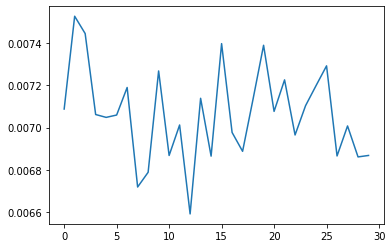

In [32]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [33]:
# Result append
y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true1':test_df['PM2.5_pi'].values[n_input:],'y_pred':y_pred.ravel()})
print(results)

      y_true1    y_pred
0    6.005000  9.820319
1    6.646667  9.437680
2    4.817500  9.277730
3    6.790909  9.099029
4    3.716667  8.296429
..        ...       ...
102  6.740000  5.959925
103  3.617500  6.444939
104  8.692727  8.256267
105  9.065833  6.676171
106  6.267778  9.356320

[107 rows x 2 columns]


MSE:  13.976497169798463
MAE:  3.2893919069291413


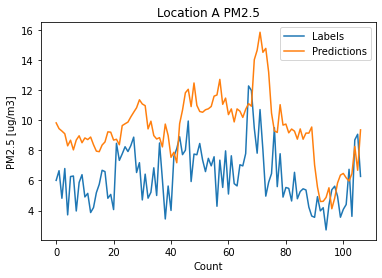

In [34]:
# Dropout = 0.1
# Epochs = 30
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
# plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

# MSE, MAE
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))


MSE:  14.038262085743426
MAE:  3.3369855720183668


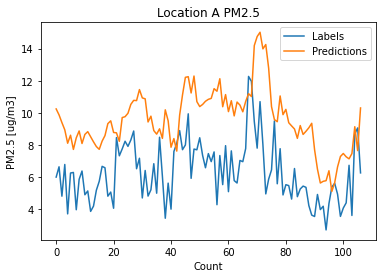

In [29]:
# Dropout = 0.1
# Epochs = 20
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
# plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

# MSE, MAE
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))


MSE:  10.69406403962647
MAE:  2.8449326515147333


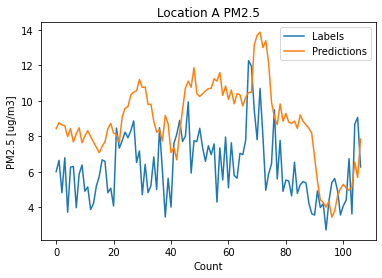

In [24]:
# Dropout = 0.1
# Epochs = 15
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
# plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

# MSE, MAE
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))


MSE:  27.32221283072696
MAE:  4.78699965098455


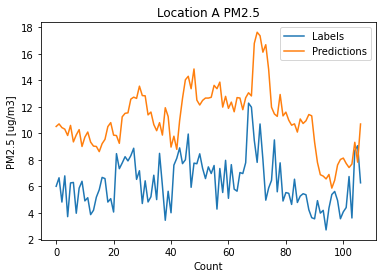

In [101]:
# Dropout = 0.0
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
# plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

# MSE, MAE
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))


MSE:  25.977704125837636
MAE:  4.7381101610530685


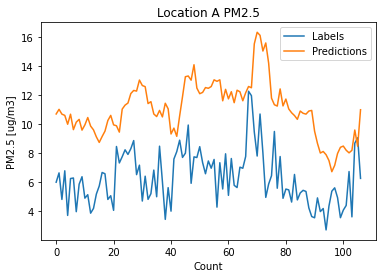

In [96]:
# Dropout = 0.1
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
# plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

# MSE, MAE
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))


MSE:  29.058177056895467
MAE:  5.0329906715437


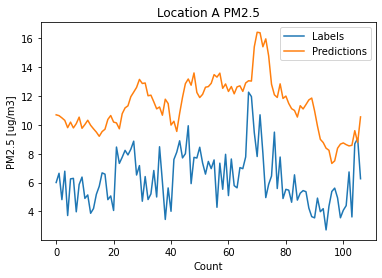

In [91]:
# Dropout = 0.3
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
# plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

# MSE, MAE
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))
